# Lab 6: Grouping Online News into Categories

## Definitions
- **Category:** A distinct group or class into which similar items, events, or people are grouped.
- **Text Classification:** The process of automatically assigning predefined categories or labels to free-text documents based on their content.
- **Data Preprocessing:** The process of cleaning and preparing data for analysis or model training. It involves tasks such as handling missing values, removing noise, and standardizing data.
- **Text Vectorization:** The process of converting text data into numerical vectors that machine learning models can understand. Techniques like TF-IDF (Term Frequency-Inverse Document Frequency) and word embeddings are commonly used for text vectorization.
- **Random Forest Classifier:** Random Forest is an ensemble learning algorithm that builds multiple decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees. It improves accuracy and reduces overfitting compared to a single decision tree.
- **Word Cloud:** A word cloud is a visualization technique that displays words from a text document, where the size of each word represents its frequency or importance in the document.
- **Confusion Matrix:** A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm and provides insight into the types of errors being made.

## Formulas
- **TF-IDF (Term Frequency-Inverse Document Frequency):** A numerical statistic that reflects the importance of a word in a document relative to a corpus of documents.\
   - **TF (Term Frequency):** Measures how often a term appears in a document.\
   - **IDF (Inverse Document Frequency):** Measures how important a term is across the entire corpus.\
   
   
   
- **Term Frequency (TF):** 
    $$ \text{TF}(t,d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} $$

- **Inverse Document Frequency (IDF):** 
    $$ \text{IDF}(t) = \log\left(\frac{N}{\text{DF}(t)}\right) $$
    where \(N\) is the total number of documents and \(\text{DF}(t)\) is the number of documents containing the term \(t\).

- **TF-IDF formula:** 
    $$ \text{TF-IDF}(t,d) = \text{TF}(t,d) \times \text{IDF}(t) $$



## Algorithm
- **Random Forest Classifier:** \
   - **Overview:** Random Forest is an ensemble learning method based on decision trees. It builds multiple decision trees during training and merges their predictions to improve accuracy and reduce overfitting.\
   - **Training:** \
       1. Randomly select subsets of the training data.\
       2. Construct decision trees based on these subsets.\
       3. Aggregate the predictions of individual trees to make the final prediction.\
   - **Prediction:** For classification tasks, the final prediction is typically determined by a majority vote among the individual trees.

## Concepts
- **Word Cloud:** A visualization technique for representing text data where the size of each word indicates its frequency.
- **Confusion Matrix:** A table that summarizes the performance of a classification model by comparing predicted and actual classes.
- **Pie Chart:** A circular statistical graphic divided into slices to illustrate numerical proportions.
- **Training and Testing Sets:** The division of data into subsets for training a model (training set) and evaluating its performance (testing set).
- **Preprocessing:** The steps involved in preparing data for analysis or modeling, such as converting text to lowercase and removing punctuation.
- **Overfitting and Underfitting:** Overfitting occurs when a model learns the training data too well, capturing noise and irrelevant patterns that do not generalize well to new data. Underfitting occurs when a model is too simple to capture the underlying structure of the data.
- **Ensemble Learning:** Ensemble learning combines multiple models to improve performance. Random Forest is an example of ensemble learning, where multiple decision trees are combined to make predictions.


In [1]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Step 1: Read the Data

In [2]:
df = pd.read_csv("bbc_news.csv")


# Step 2: Explore the Data

In [3]:
df.shape

(2225, 2)

In [4]:
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [5]:
df.columns

Index(['category', 'text'], dtype='object')

In [6]:
df.isna().sum()

category    0
text        0
dtype: int64

In [7]:
# Find unique categories and print them
categories = df['category'].unique()
print("Categories:")
for category in categories:
    print(category)

Categories:
tech
business
sport
entertainment
politics


# Step 3: Plot Distribution of Categories

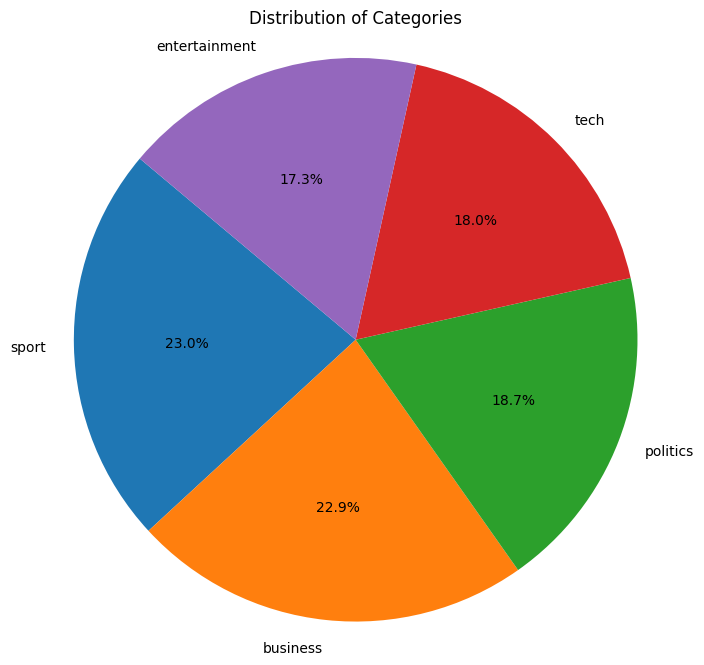

In [8]:
# Count the occurrences of each category
category_counts = df['category'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# Step 4: Define Word Cloud Function and generare cloud

In [9]:
def generate_wordcloud(category, text):
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category.capitalize()}')
    plt.axis('off')
    plt.show()

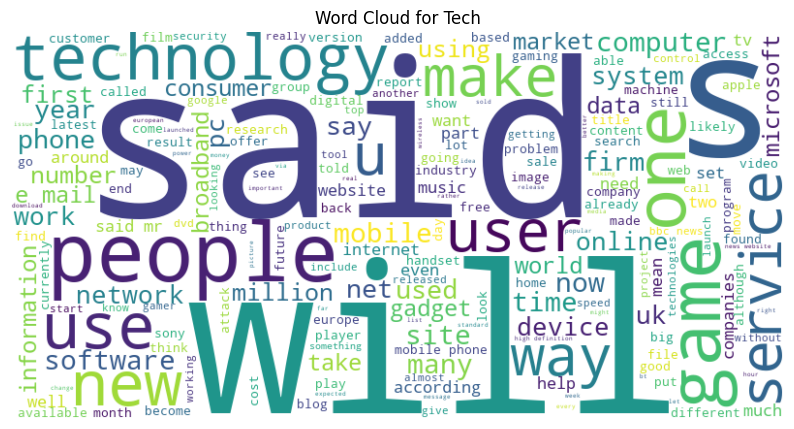

In [10]:
# Call generate_wordcloud function for 'tech' category
tech_text = ' '.join(df[df['category'] == 'tech']['text'])
generate_wordcloud('tech', tech_text)

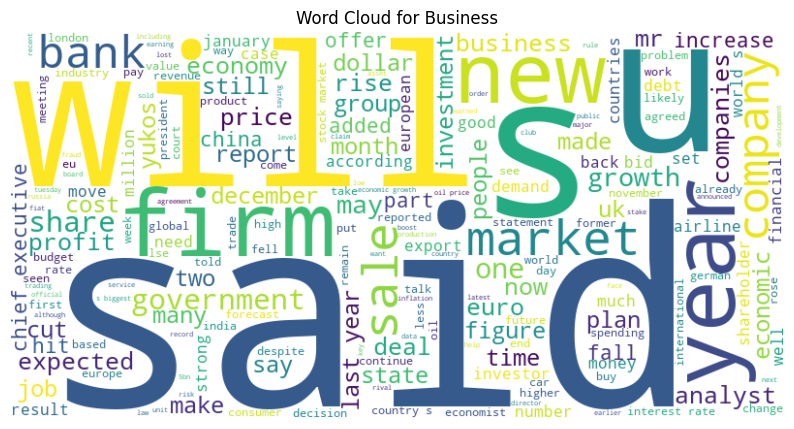

In [11]:
# Call generate_wordcloud function for 'business' category
business_text = ' '.join(df[df['category'] == 'business']['text'])
generate_wordcloud('business', business_text)


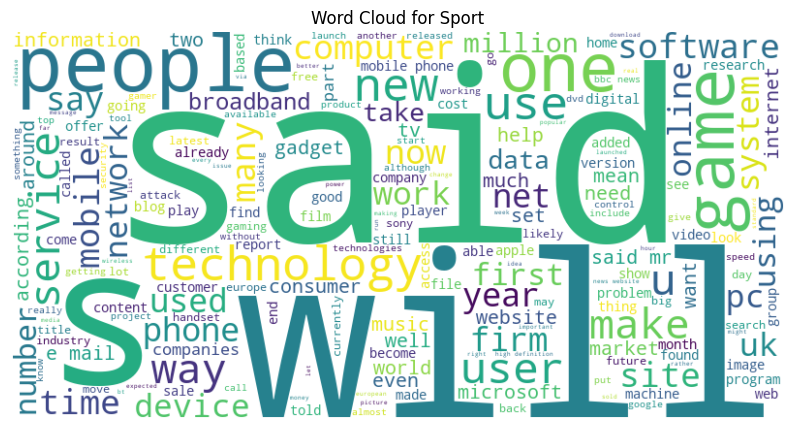

In [12]:
# Call generate_wordcloud function for 'tech' category
sport_text = ' '.join(df[df['category'] == 'sport']['text'])
generate_wordcloud('sport', tech_text)

# Step 5: Preprocess the Text Data

In [13]:

# Convert text to lowercase
df['text'] = df['text'].str.lower()

# Remove punctuation
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


# Step 6: Split Data and Vectorize Text


In [14]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



# Step 7: Train a Classifier

In [15]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)


RandomForestClassifier()

# Step 8: Make Predictions

Mahato aims to set up an ‘alternative’ political force whose goal is to establish a ‘pluralistic nation-state’.

Outcome cloudy of the four-day Mahasamiti as president Deuba and general secretary Thapa clashed on the issue.

Preeti Rai scored in stoppage time to ensure that the team progressed into the tournament finals.

Namibian Loftie-Eaton cracks 11 fours and eight sixes to reach his hundred-run milestone off just 33 balls at the TU Cricket Ground during the Nepal Tri-National Series, eclipsing Nepal’s Kushal Malla’s record by one ball.



In [16]:
# Make predictions
predictions = rf_classifier.predict(X_test_tfidf)

In [17]:
news = input("Enter News")

Enter NewsNamibian Loftie-Eaton cracks 11 fours and eight sixes to reach his hundred-run milestone off just 33 balls at the TU Cricket Ground during the Nepal Tri-National Series, eclipsing Nepal’s Kushal Malla’s record by one ball.


In [18]:
# Predict categories for new news articles
new_articles = [news]
new_articles_tfidf = tfidf_vectorizer.transform(new_articles)
predicted_categories = rf_classifier.predict(new_articles_tfidf)
print(predicted_categories)


['sport']


# Step 9: Evaluate Model with Confusion Matrix

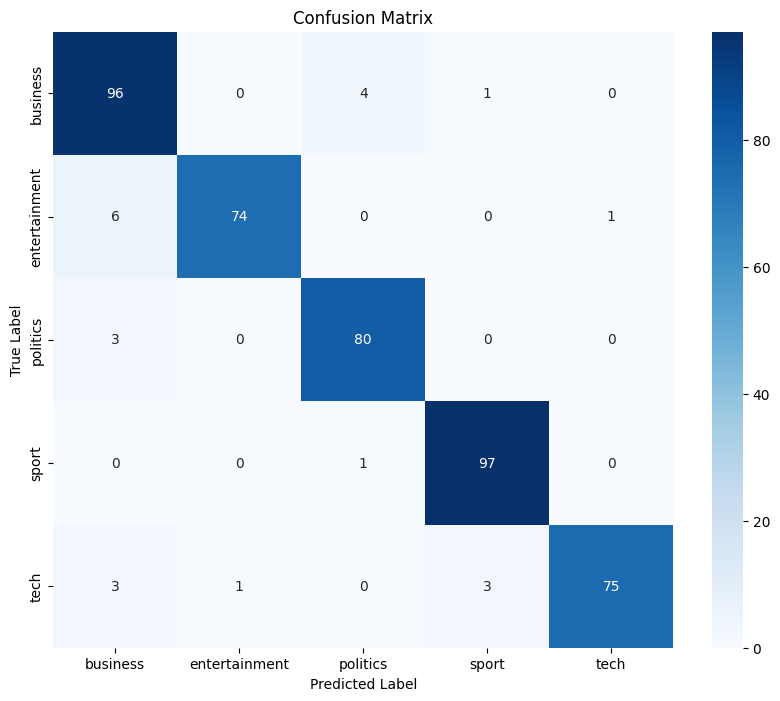

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions for the test set
predictions = rf_classifier.predict(X_test_tfidf)

# Get the actual category labels
actual_categories = y_test

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_categories, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
